#IS 470 Assignment 3: Wine Quality

---
We have been given a Wine Quality dataset from the UCI Machine Learning Repository. The dataset contains information about chemical properties of the wine and their quality rating on scale from **0** ( 0 is very bad ) to **10** ( 10 is very good ).
<br><br>
Here, the goal is to predict the **quality** of wines based on various chemical attributes through regression analysis and comparing different models.
<br><br>
Number of Observations and Variables :

*   **Observations**: The dataset contains **1,599** observations.
*   **Variables**: There are **12** variables in total.

Variable Descriptions :

*   **Fixed Acidity**: The amount of fixed acids in the wine, primarily tartaric acid. It contributes to the wine's taste and stability.
*   **Volatile Acidity**: The amount of acetic acid in the wine, which can affect the wine's taste and aroma. High levels can lead to an unpleasant vinegar taste.
*   **Citric Acid**: A weak organic acid that can enhance the freshness and flavor of the wine. It is often added to improve taste.
*   **Residual Sugar**: The amount of sugar remaining after fermentation, which can influence sweetness and mouthfeel.
*   **Chlorides**: The concentration of salt in the wine, which can affect taste and overall quality.
*   **Free Sulfur Dioxide**: The amount of free SO2 available in the wine, which acts as a preservative and prevents oxidation and spoilage.
*   **Total Sulfur Dioxide**: The total amount of SO2 in the wine, including both free and bound forms. It is important for preservation but can impact flavor if too high.
*   **Density**: The density of the wine solution, which is influenced by sugar and alcohol content. It helps in determining the wine's body.
*   **pH**: A measure of acidity or alkalinity in the wine. It affects taste, color, and stability.
*   **Sulphates**: The concentration of sulfates in the wine, which can enhance flavor and stability.
*   **Alcohol**: The percentage of alcohol by volume (ABV) in the wine. It significantly influences flavor and body.

Target Variable: **quality** ( A quality score assigned by tasters. Higher scores indicate better quality wines )
<br><br>



In [246]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Upload and clean data

In [112]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from csv import reader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [94]:
# Read data
winequality_red = pd.read_csv("/content/drive/MyDrive/IS470_data/winequality_red.csv")
winequality_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [95]:
# Examine the number of rows and cols
winequality_red.shape

(1599, 12)

In [96]:
# Show the head rows of a dataset
winequality_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [97]:
# Check for missing values
winequality_red.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [98]:
# Examine variable type
winequality_red.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [99]:
# Obtain the quality for each wine
winequality_red['quality']

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


###Statistical analysis of the data

In [100]:
# Display summary statistics
winequality_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [101]:
# Handling outliers (using IQR method)
Q1 = winequality_red.quantile(0.25)
Q3 = winequality_red.quantile(0.75)
IQR = Q3 - Q1
print('The IQR of each variable is:')
print(IQR)

The IQR of each variable is:
fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [102]:
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('The lower bound of each variable is:')
print(lower_bound)
print()
print('The Upper Bound of each variable is:')
print(upper_bound)

The lower bound of each variable is:
fixed acidity            3.950000
volatile acidity         0.015000
citric acid             -0.405000
residual sugar           0.850000
chlorides                0.040000
free sulfur dioxide    -14.000000
total sulfur dioxide   -38.000000
density                  0.992248
pH                       2.925000
sulphates                0.280000
alcohol                  7.100000
quality                  3.500000
dtype: float64

The Upper Bound of each variable is:
fixed acidity            12.350000
volatile acidity          1.015000
citric acid               0.915000
residual sugar            3.650000
chlorides                 0.120000
free sulfur dioxide      42.000000
total sulfur dioxide    122.000000
density                   1.001187
pH                        3.685000
sulphates                 1.000000
alcohol                  13.500000
quality                   7.500000
dtype: float64


In [103]:
# Read data line by line
quality = []
with open('/content/drive/MyDrive/IS470_data/winequality_red.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        quality.append(row)

In [104]:
# Show the number of unique items
flat_list = np.concatenate(quality).flat
unique_item, item_count = np.unique(flat_list, return_counts=True)
print("number of unique items:", len(unique_item))

number of unique items: 1152


In [105]:
# Calculate correlation matrix for quality
corr_matrix = winequality_red.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


###Visualization of the Relationships

Text(0.5, 1.0, 'Histogram of Wine Quality in the winequality_red data set')

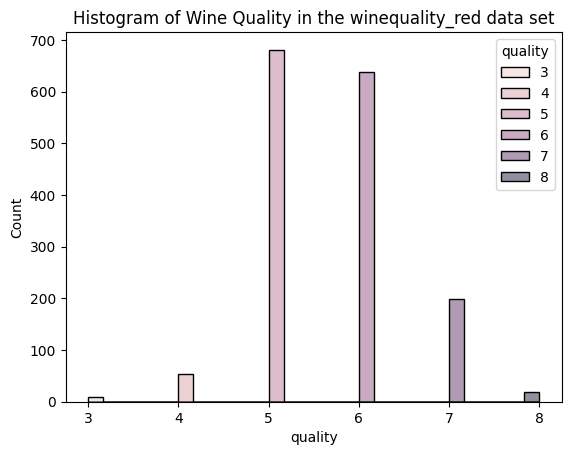

In [106]:
# Histogram of quality ( This relationship shows us how many wines of wate quality are in the dataset)
snsplot = sns.histplot(x='quality',  hue = 'quality',data = winequality_red)
snsplot.set_title("Histogram of Wine Quality in the winequality_red data set")

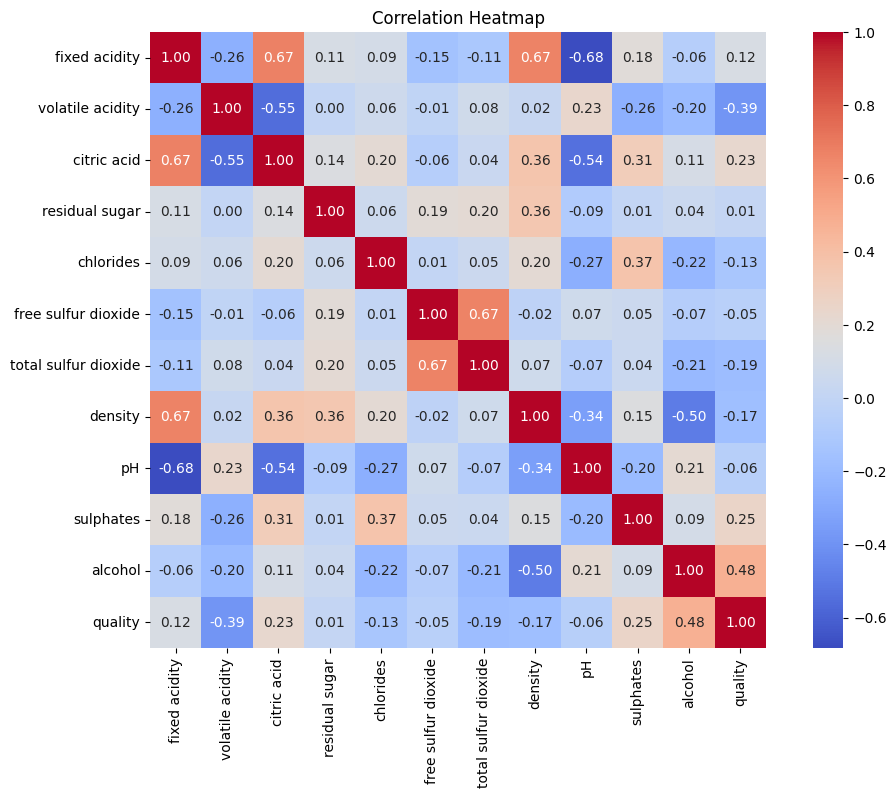

In [107]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

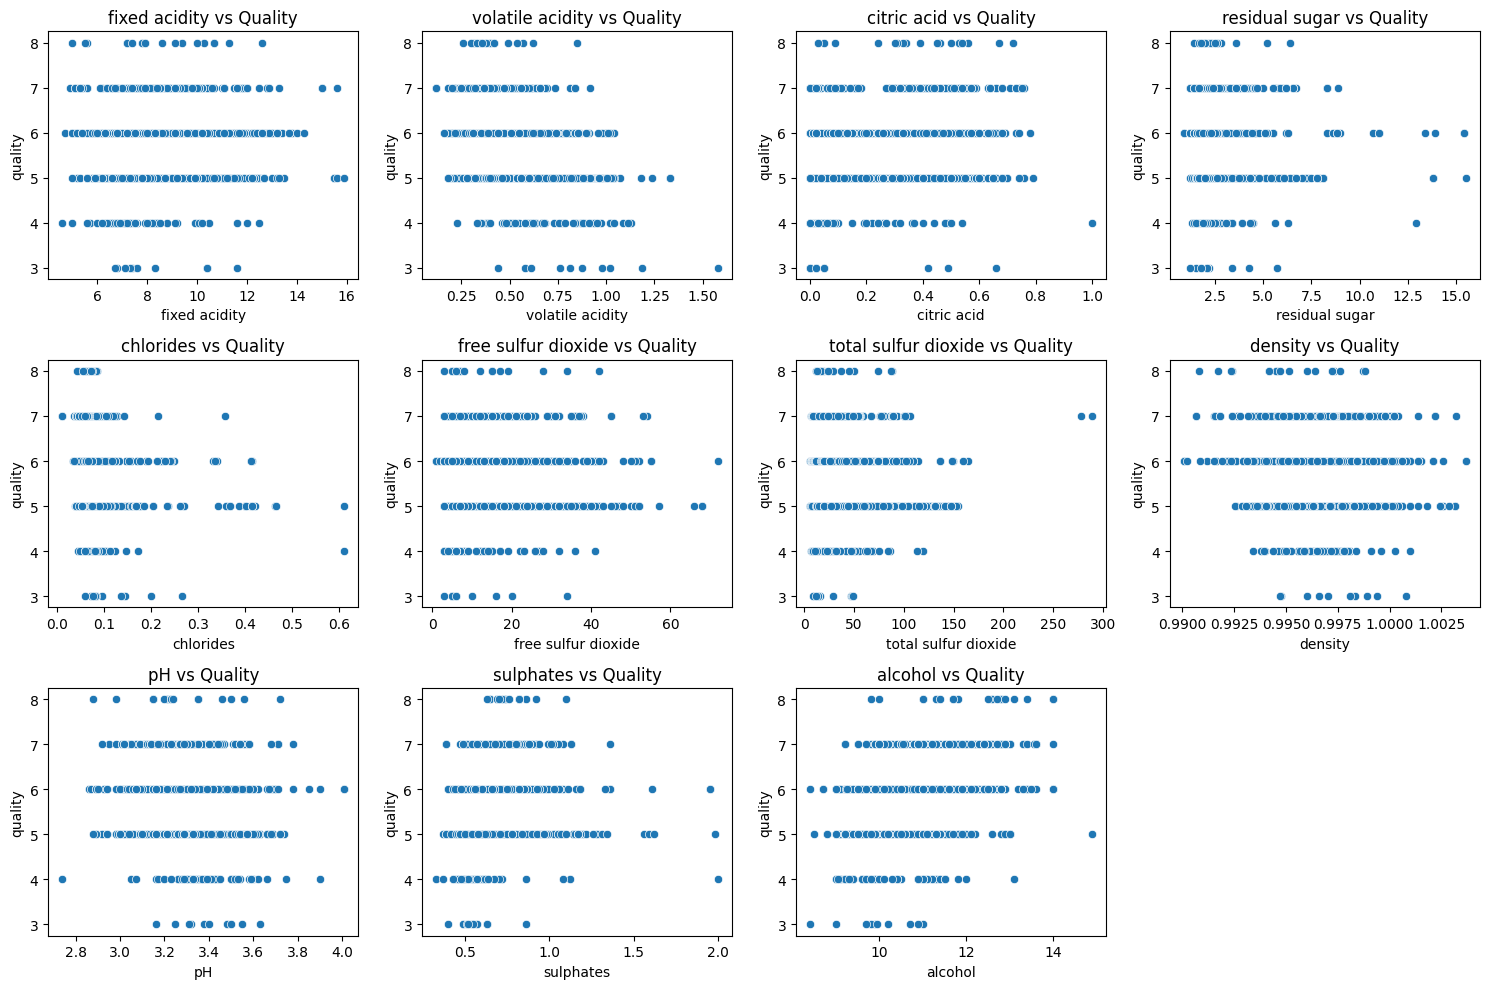

In [108]:
# Scatter plots for continuous features vs. quality
plt.figure(figsize=(15, 10))
for i, column in enumerate(winequality_red.columns[:-1]):  # Exclude 'quality'
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=winequality_red[column], y=winequality_red['quality'])
    plt.title(f'{column} vs Quality')
plt.tight_layout()
plt.show()

###Simple Linear Regresssion

In [205]:
# Partition the data
target = winequality_red['quality']
predictors = winequality_red.drop(['quality'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [206]:
# Build a simple linear regression model with only alcohol as predictor
model1 = LinearRegression()
model1.fit(predictors_train[['alcohol']], target_train)

LinearRegression()

In [207]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train[['alcohol']])
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     367.4
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           3.60e-72
Time:                        07:32:02   Log-Likelihood:                -1378.2
No. Observations:                1279   AIC:                             2760.
Df Residuals:                    1277   BIC:                             2771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8493      0.198      9.343      0.0

In [208]:
# Make predictions on testing data
prediction_on_test = model1.predict(predictors_test[['alcohol']])

In [209]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_simple_linear = mean_absolute_error(target_test, prediction_on_test)
RMSE_simple_linear = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_simple_linear)
print("RMSE:", RMSE_simple_linear)

MAE: 0.5749664687393711
RMSE: 0.706773042831321


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###Multiple linear regression

In [210]:
# Build a multiple linear regression model with all predictors
model2 = linear_model.LinearRegression()
model2.fit(predictors_train, target_train)

LinearRegression()

In [211]:
# Show model summary
import statsmodels.api as sm
X2 = sm.add_constant(predictors_train)
y = target_train
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     61.48
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.48e-109
Time:                        07:32:33   Log-Likelihood:                -1266.4
No. Observations:                1279   AIC:                             2557.
Df Residuals:                    1267   BIC:                             2619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.3551 

In [212]:
# Make predictions on testing data
prediction_on_test = model2.predict(predictors_test)

In [213]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_multiple_linear = mean_absolute_error(target_test, prediction_on_test)
RMSE_multiple_linear = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_multiple_linear)
print("RMSE:", RMSE_multiple_linear)

MAE: 0.5035304415524375
RMSE: 0.6245199307980125


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###Regression Tree

In [226]:
# Partition the data
target = winequality_red['quality']
predictors = winequality_red.drop(['quality'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


In [227]:
# Build a regression tree model with max_depth=3
model3 = DecisionTreeRegressor(random_state=42, max_depth=3)
model3.fit(predictors_train, target_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

[Text(0.5, 0.875, 'alcohol <= 10.525\nsquared_error = 0.651\nsamples = 1279\nvalue = 5.624'),
 Text(0.25, 0.625, 'sulphates <= 0.575\nsquared_error = 0.437\nsamples = 786\nvalue = 5.36'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'density <= 1.001\nsquared_error = 0.343\nsamples = 314\nvalue = 5.131'),
 Text(0.0625, 0.125, 'squared_error = 0.329\nsamples = 313\nvalue = 5.137'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.375, 0.375, 'volatile acidity <= 0.405\nsquared_error = 0.441\nsamples = 472\nvalue = 5.513'),
 Text(0.3125, 0.125, 'squared_error = 0.512\nsamples = 110\nvalue = 5.845'),
 Text(0.4375, 0.125, 'squared_error = 0.375\nsamples = 362\nvalue = 5.412'),
 Text(0.75, 0.625, 'sulphates <= 0.585\nsquared_error = 0.704\nsamples = 493\nvalue = 6.045'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'volatile acidity <= 1.0\nsquared_error = 0.801\nsamples = 127\nvalue = 5.504'),
 Text(0.5625, 0.125, 'squared_error = 0.64\nsamples = 12

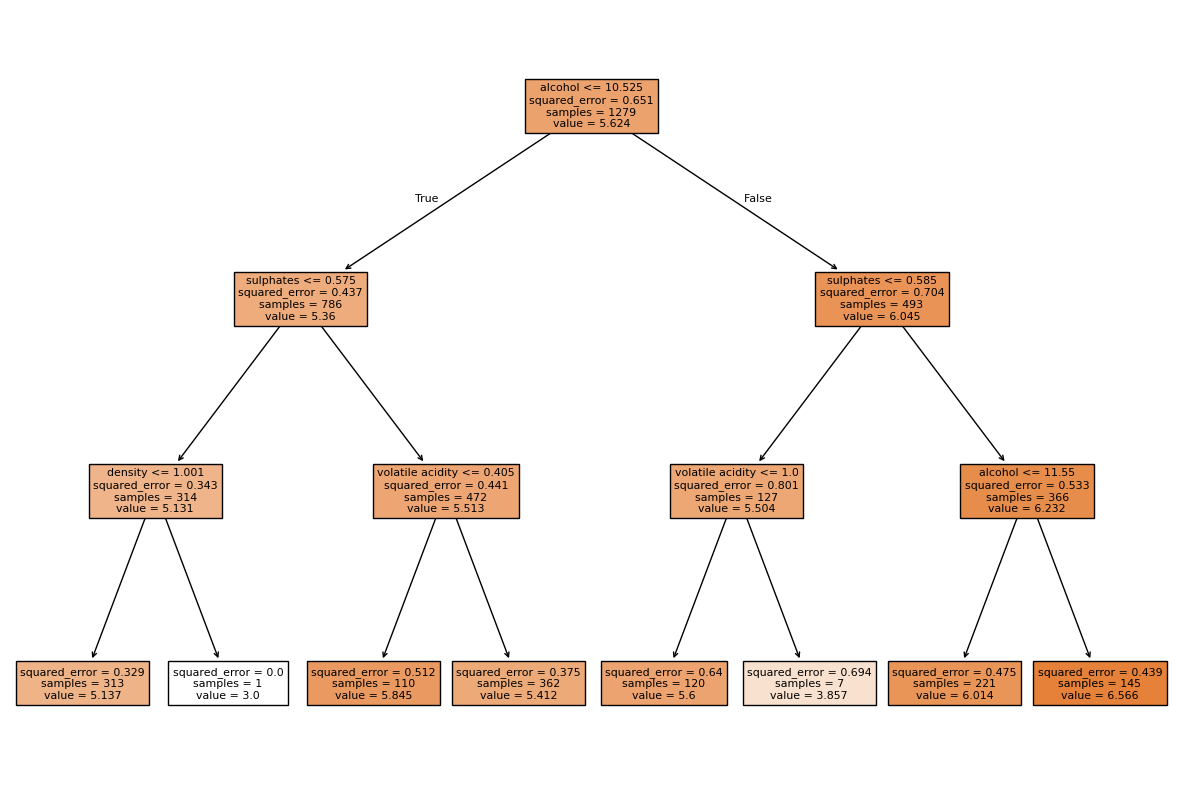

In [228]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(15,10))
tree.plot_tree(model3,
               feature_names=list(predictors_train.columns),
               filled=True)

In [229]:
# Make predictions on testing data
prediction_on_test = model3.predict(predictors_test)

In [230]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_regression_tree = mean_absolute_error(target_test, prediction_on_test)
RMSE_regression_tree= mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_regression_tree)
print("RMSE:", RMSE_regression_tree)

MAE: 0.54097632624191
RMSE: 0.6820495881431973


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###SVR model (C=1)

In [231]:
# Create a SVR model
model4 = SVR(kernel='linear', C=1.0)
model4.fit(predictors_train, target_train)

SVR(kernel='linear')

In [232]:
# Make predictions on testing data
prediction_on_test = model4.predict(predictors_test)

In [233]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_svr_1 = mean_absolute_error(target_test, prediction_on_test)
RMSE_svr_1 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_svr_1)
print("RMSE:", RMSE_svr_1)

MAE: 0.5022126416292931
RMSE: 0.6340413598690094


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###SVR model (C=5)

In [234]:
# Create a SVR model
model5 = SVR(kernel='linear', C=5.0)
model5.fit(predictors_train, target_train)

SVR(C=5.0, kernel='linear')

In [235]:
# Make predictions on testing data
prediction_on_test = model5.predict(predictors_test)

In [236]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_svr_5 = mean_absolute_error(target_test, prediction_on_test)
RMSE_svr_5 = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_svr_5)
print("RMSE:", RMSE_svr_5)

MAE: 0.5010181206022374
RMSE: 0.6320745636843115


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###MLP model

In [237]:
#Build MLP model contains two hidden layers: 64 hidden nodes for the first layer, 16 hidden nodes for the second layer, and 8 hidden nodes for the third layer. Set random_state=1.
model_MLP_1= MLPClassifier(hidden_layer_sizes=(64,16,8), random_state=1)
model_MLP_1.fit(predictors_train, target_train)

MLPClassifier(hidden_layer_sizes=(64, 16, 8), random_state=1)

In [238]:
# Make predictions on testing data (0.5 points)
prediction_on_test = model_MLP_1.predict(predictors_test)

In [239]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE_mlp = mean_absolute_error(target_test, prediction_on_test)
RMSE_mlp = mean_squared_error(target_test, prediction_on_test, squared=False)
print("MAE:", MAE_mlp)
print("RMSE:", RMSE_mlp)

MAE: 0.459375
RMSE: 0.7180703308172536


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


###Comparison Table for MAE and RMSE

In [240]:
# Create a comparison table for MAE and RMSE
comparison_table = pd.DataFrame({'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Regression Tree', 'SVR (C=1)', 'SVR (C=5)', 'MLP'],
                                  'MAE': [MAE_simple_linear, MAE_multiple_linear, MAE_regression_tree, MAE_svr_1, MAE_svr_5, MAE_mlp],
                                  'RMSE': [RMSE_simple_linear, RMSE_multiple_linear, RMSE_regression_tree, RMSE_svr_1, RMSE_svr_5, RMSE_mlp]})
comparison_table


,Model,MAE,RMSE
0,Simple Linear Regression,0.574966,0.706773
1,Multiple Linear Regression,0.503530,0.624520
2,Regression Tree,0.540976,0.682050
3,SVR (C=1),0.502213,0.634041
4,SVR (C=5),0.501018,0.632075
5,MLP,0.459375,0.718070


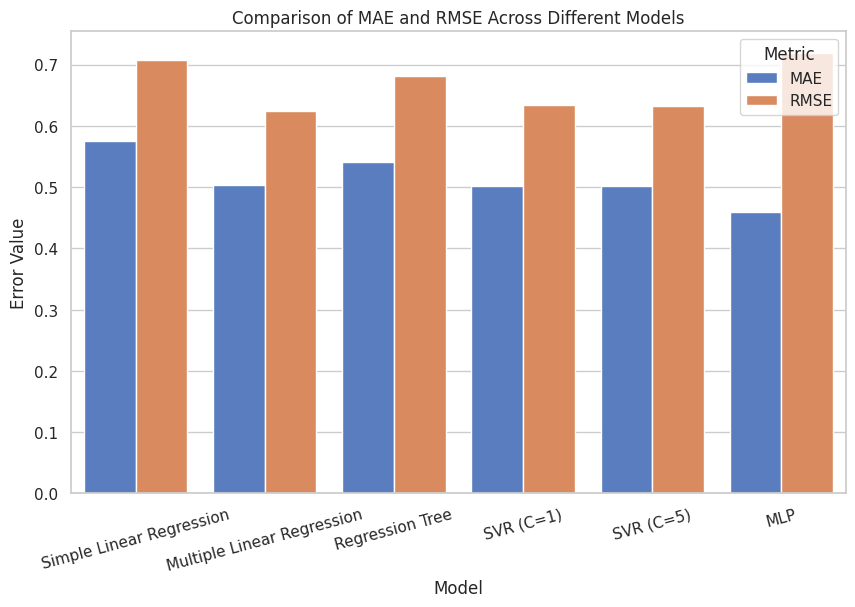

In [243]:
# Convert to DataFrame
results_df = pd.DataFrame(comparison_table)

# Melt the DataFrame to long format for easier plotting
results_melted = results_df.melt(id_vars='Model', value_vars=['MAE', 'RMSE'],
                                   var_name='Metric', value_name='Value')
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=results_melted, palette='muted')

# Add titles and labels
plt.title('Comparison of MAE and RMSE Across Different Models')
plt.xlabel('Model')
plt.ylabel('Error Value')
plt.xticks(rotation=15)  # Rotate x labels for better readability
plt.legend(title='Metric')

###Trade-offs

Discussion of Trade-offs Between Models
<br><br>
**Simple Linear Regression**:<br>
MAE: 0.575<br>
RMSE: 0.707<br>
Trade-offs:<br>
Pros:
Easy to interpret and implement.
Provides insights into the relationship between the predictor (e.g., alcohol content) and the target variable (quality).<br>
Cons:
Assumes a linear relationship, which may not capture more complex patterns in the data.
Higher error metrics compared to more advanced models.
<br><br>
**Multiple Linear Regression**:<br>
MAE: 0.504<br>
RMSE: 0.625<br>
Trade-offs:<br>
Pros:
Can incorporate multiple predictors, potentially leading to better performance than simple linear regression.
Provides coefficients for each predictor, aiding interpretability.<br>
Cons:
Still assumes linear relationships among predictors and the target variable.
Susceptible to multicollinearity if predictors are correlated.
<br><br>
Regression Tree:<br>
MAE: 0.541<br>
RMSE: 0.682<br>
Trade-offs:<br>
Pros:
Captures non-linear relationships effectively.
Easy to visualize and interpret as a tree structure.<br>
Cons:
Prone to overfitting, especially with deep trees.
Performance can vary significantly based on tree depth and other hyperparameters.
<br><br>
**Support Vector Regression** (SVR):<br>
SVR (C=1)<br>
MAE: 0.502<br>
RMSE: 0.634<br>
SVR (C=5)<br>
MAE: 0.501<br>
RMSE: 0.632<br>
Trade-offs:<br>
Pros:
Effective in high-dimensional spaces and can model complex non-linear relationships using different kernels.
Both configurations (C=1 and C=5) show comparable performance, indicating robustness.<br>
Cons:
More complex to tune compared to linear models; requires careful selection of hyperparameters (e.g., C value).
Computationally intensive, especially with larger datasets.
<br><br>
**Multi-Layer Perceptron** (MLP):<br>
MAE: 0.459<br>
RMSE: 0.718<br>
Trade-offs:<br>
Pros:
Capable of capturing very complex relationships due to its architecture.
Can generalize well if properly tuned with sufficient data.<br>
Cons:
Requires more data for training effectively; risk of overfitting if not managed carefully.
Less interpretable than linear models; harder to understand how input features affect predictions.

### The Most Suitable Model

**Based on the performance metrics provided**:<br>

*   The model with the lowest **MAE** is the Multi-Layer Perceptron (MLP) with an **MAE** of 0.459, indicating it has the best average error in predictions among all models.
*   However, its **RMSE** is relatively high at 0.718, suggesting that while it performs well on average, it might have some larger errors on certain predictions.

**Conclusion** :<br>

*   The most suitable model for predicting wine quality is the **Multi-Layer Perceptron (MLP)** due to its lowest MAE, indicating superior average predictive accuracy.




###HTML

In [247]:
!jupyter nbconvert --to html "/content/drive/MyDrive/IS470_data/Assignment_3.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/IS470_data/Assignment_3.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 1143061 bytes to /content/drive/MyDrive/IS470_data/Assignment_3.html
